In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [2]:
df = pd.read_csv('/content/drive/MyDrive/modern_feminism_sentiment/data/processed/feminism_sentiment_results.csv')


In [3]:
df.head()



,date,username,retweets,likes,tweet_text,hashtags,clean_text,neg,neu,pos,compound,sentiment
0,2018-09-25 20:33:53,DanielleMuscato,10682,21677,"Ladies, a question for you: ""What would you do...",#metoo #metoo #Kavanaugh #Cosby #feminism #mal...,lady question would men curfew dude read reply...,0.078,0.782,0.140,0.2732,Positive
1,2019-11-29 12:05:32,bbcle,4176,6269,This is a #Chilean #feminist #protest by the g...,#Chilean #feminist #protest #Lastesis #questio...,chilean feminist protest group lastesis answer...,0.265,0.735,0.000,-0.7579,Negative
2,2019-03-11 15:11:55,TheBrandonMorse,3240,11968,#Feminism is really making some great strides ...,#Feminism,feminism really making great stride,0.000,0.477,0.523,0.6573,Positive
3,2019-05-09 16:10:51,Payal_Rohatgi,2034,6341,Swara aunty calls herself a supporter of #Femi...,#Feminism #ModiAaneWalaHai #JustModi #RahulKaB...,swara aunty call supporter feminism supporter ...,0.000,0.699,0.301,0.7096,Positive
4,2019-08-30 20:50:51,fuxkinglnz,2029,2560,Young girl named israa ghareeb was beaten to d...,#feminism #feminist,young girl named israa ghareeb beaten death da...,0.239,0.679,0.082,-0.6597,Negative


In [4]:
df.shape

(237317, 12)

In [5]:
texts = df["clean_text"].dropna()


In [6]:
vectorizer = CountVectorizer(
    max_df=0.9,      # ignore very common words
    min_df=10,       # ignore very rare words
    stop_words="english"
)

dtm = vectorizer.fit_transform(texts)


In [7]:
dtm.shape


(237317, 16975)

In [8]:
lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42
)

lda.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(
            " ".join(
                [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
            )
        )

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)



Topic 1:
woman feminist men like equality love amp need dont man

Topic 2:
history culture sexual education feminist harassment crime childabuse unsg humanright

Topic 3:
feminist amp book new woman trump read islam blacklivesmatter gender

Topic 4:
metoo genderequality woman learn violence empower abuse equality victim share

Topic 5:
woman metoo female girl genderequality gender thought equality violence share


In [10]:
topic_values = lda.transform(dtm)
df_topics = pd.DataFrame(topic_values)

df["dominant_topic"] = df_topics.idxmax(axis=1) + 1


In [11]:
df["dominant_topic"].value_counts()


,count
dominant_topic,
1,104339
3,51781
4,36697
2,22766
5,21734


<Axes: title={'center': 'Topic Distribution in Feminism Tweets'}, xlabel='dominant_topic'>

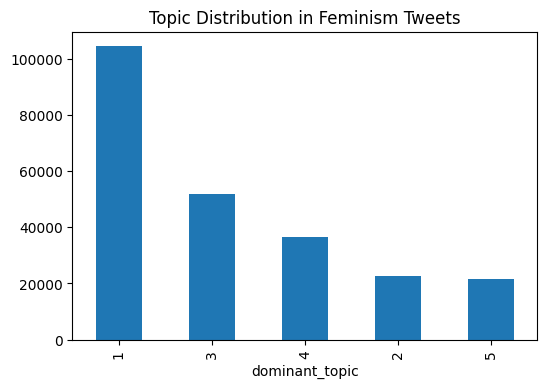

In [12]:
df["dominant_topic"].value_counts().plot(
    kind="bar",
    title="Topic Distribution in Feminism Tweets",
    figsize=(6,4)
)


In [13]:
pd.crosstab(
    df["dominant_topic"],
    df["sentiment"],
    normalize="index"
)


sentiment,Negative,Neutral,Positive
dominant_topic,,,
1,0.338109,0.192229,0.469661
2,0.406352,0.248397,0.345252
3,0.146289,0.306329,0.547382
4,0.342262,0.246832,0.410906
5,0.284531,0.279240,0.436229


In [14]:
df.to_csv("feminism_topic_results.csv", index=False)
print("✅ feminism_topic_results.csv saved successfully")


✅ feminism_topic_results.csv saved successfully
